In [3]:
# !pip install pandas-datareader

In [84]:
import pandas_datareader.data as reader
import pandas as pd
import requests
import datetime as dt
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
start = dt.date(2020, 1, 1)
end = dt.date(2022, 1, 18)
stocks = ['0700.HK', '0005.HK', '1299.HK', '1810.HK', '9988.HK', '3690.HK', '2318.HK']

df = reader.get_data_yahoo(stocks, start, end)

In [ ]:
df = df['Adj Close']

In [55]:
df.head()

Symbols,0700.HK,0005.HK,1299.HK,1810.HK,9988.HK,3690.HK,2318.HK
Date,,,,,,,
2020-01-02,380.297546,58.445938,82.010986,11.22,210.000000,103.500000,87.541420
2020-01-03,380.894257,57.966087,82.495117,10.90,212.000000,104.199997,88.242508
2020-01-06,375.325012,57.582199,81.623688,10.98,211.000000,109.500000,87.728371
2020-01-07,383.479980,57.486237,82.591949,11.00,212.600006,110.400002,87.494675
2020-01-08,379.899750,56.910408,81.139565,11.08,210.800003,106.400002,86.419685


In [54]:
df['0700.HK']['2020-01-02':'2020-01-05']

Date
2020-01-02    380.297546
2020-01-03    380.894257
Name: 0700.HK, dtype: float64

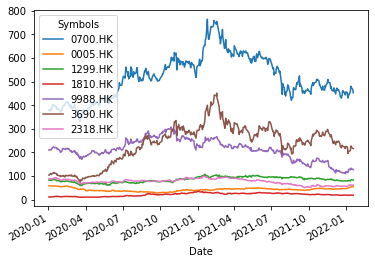

In [44]:
df.plot()
plt.show()

Percentage Change

In [45]:
daily_returns = df.pct_change()

In [62]:
daily_returns.head()

Symbols,0700.HK,0005.HK,1299.HK,1810.HK,9988.HK,3690.HK,2318.HK
Date,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.001569,-0.008210,0.005903,-0.028521,0.009524,0.006763,0.008009
2020-01-06,-0.014621,-0.006623,-0.010563,0.007339,-0.004717,0.050864,-0.005826
2020-01-07,0.021728,-0.001667,0.011863,0.001822,0.007583,0.008219,-0.002664
2020-01-08,-0.009336,-0.010017,-0.017585,0.007273,-0.008467,-0.036232,-0.012286


Correlation Heatmap

In [63]:
daily_returns.cov()

Symbols,0700.HK,0005.HK,1299.HK,1810.HK,9988.HK,3690.HK,2318.HK
Symbols,,,,,,,
0700.HK,0.000627,0.000068,0.000170,0.000356,0.000481,0.000730,0.000146
0005.HK,0.000068,0.000356,0.000182,0.000060,0.000102,0.000063,0.000131
1299.HK,0.000170,0.000182,0.000421,0.000183,0.000157,0.000235,0.000181
1810.HK,0.000356,0.000060,0.000183,0.000944,0.000354,0.000643,0.000164
9988.HK,0.000481,0.000102,0.000157,0.000354,0.000774,0.000680,0.000178
3690.HK,0.000730,0.000063,0.000235,0.000643,0.000680,0.001509,0.000206
2318.HK,0.000146,0.000131,0.000181,0.000164,0.000178,0.000206,0.000285


In [65]:
daily_returns.var()

Symbols
0700.HK    0.000627
0005.HK    0.000356
1299.HK    0.000421
1810.HK    0.000944
9988.HK    0.000774
3690.HK    0.001509
2318.HK    0.000285
dtype: float64

In [66]:
daily_returns.corr()

Symbols,0700.HK,0005.HK,1299.HK,1810.HK,9988.HK,3690.HK,2318.HK
Symbols,,,,,,,
0700.HK,1.000000,0.144521,0.330066,0.463218,0.690700,0.750611,0.344395
0005.HK,0.144521,1.000000,0.469012,0.102795,0.194917,0.085868,0.410335
1299.HK,0.330066,0.469012,1.000000,0.290606,0.275600,0.295369,0.521739
1810.HK,0.463218,0.102795,0.290606,1.000000,0.414623,0.538952,0.315616
9988.HK,0.690700,0.194917,0.275600,0.414623,1.000000,0.629865,0.378814
3690.HK,0.750611,0.085868,0.295369,0.538952,0.629865,1.000000,0.313860
2318.HK,0.344395,0.410335,0.521739,0.315616,0.378814,0.313860,1.000000


<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

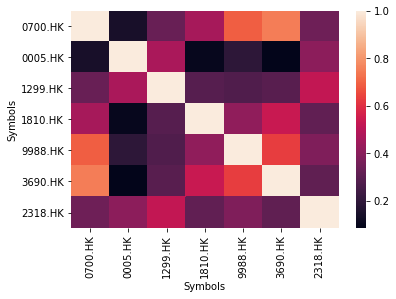

In [67]:
sns.heatmap(daily_returns.corr())

Cumulative Product of Daily Returns (for comparing different stocks)

In [60]:
daily_cum_returns = (daily_returns+1).cumprod()
daily_cum_returns

Symbols,0700.HK,0005.HK,1299.HK,1810.HK,9988.HK,3690.HK,2318.HK
Date,,,,,,,
2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,1.001569,0.991790,1.005903,0.971479,1.009524,1.006763,1.008009
2020-01-06,0.986925,0.985222,0.995277,0.978610,1.004762,1.057971,1.002136
2020-01-07,1.008368,0.983580,1.007084,0.980392,1.012381,1.066667,0.999466
2020-01-08,0.998954,0.973727,0.989374,0.987522,1.003810,1.028019,0.987186
...,...,...,...,...,...,...,...
2022-01-12,1.264273,0.902543,0.992550,1.677362,0.633333,2.193237,0.697955
2022-01-13,1.249548,0.917942,1.008401,1.664884,0.629524,2.185507,0.707665
2022-01-14,1.244815,0.933341,1.030350,1.661319,0.615714,2.131401,0.700811


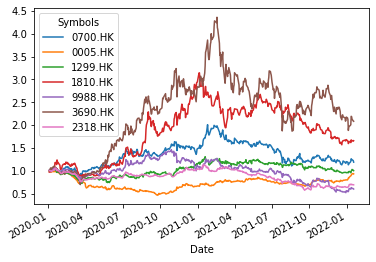

In [59]:
daily_cum_returns.plot()
plt.show()

Momentum Strategy

web scraping using Panda's read_html()

In [95]:
url = 'https://finance.yahoo.com/quote/%5EHSI/components?p=%5EHSI'
headers = {'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
response = requests.get(url, headers=headers)
df = pd.read_html(response.text)[0]

In [96]:
df.head()

,Symbol,Company Name,Last Price,Change,% Change,Volume
0,1038.HK,CK Infrastructure Holdings Limited,49.00,0.00,0.00%,556575
1,0017.HK,New World Development Company Limited,30.55,-0.05,-0.16%,1706570
2,0003.HK,The Hong Kong and China Gas Company Limited,12.14,-0.02,-0.16%,9286361
3,0002.HK,CLP Holdings Limited,78.00,0.15,+0.19%,1071227
4,0669.HK,Techtronic Industries Company Limited,137.50,-0.40,-0.29%,4349587


In [98]:
tickers = df['Symbol'].to_list()
tickers[:5]

['1038.HK', '0017.HK', '0003.HK', '0002.HK', '0669.HK']

In [99]:
start = dt.datetime(2021, 1, 1)
end = dt.datetime(2021, 12, 31)

df = reader.get_data_yahoo(tickers, start, end)['Adj Close']

In [100]:
df.head()

Symbols,1038.HK,0017.HK,0003.HK,0002.HK,0669.HK,2319.HK,3690.HK,2628.HK,0883.HK,0012.HK,...,1109.HK,2688.HK,9988.HK,2331.HK,9618.HK,0386.HK,0267.HK,0960.HK,2020.HK,1093.HK
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,40.122814,34.714363,10.837030,70.134277,113.054245,47.448639,292.600006,16.244633,6.590472,29.400492,...,29.675774,115.109474,227.600006,53.127243,343.600006,3.235019,5.065393,42.413368,125.748352,7.850361
2021-01-05,40.597637,34.950191,10.966703,70.518303,113.647705,50.922913,296.600006,16.054636,6.599820,30.209242,...,29.675774,114.414246,223.000000,53.625622,338.799988,3.235019,5.101966,42.029972,128.124710,7.771661
2021-01-06,40.360226,34.761528,10.837030,70.038269,112.757507,51.617767,310.000000,16.244633,6.880265,30.018948,...,29.388590,114.215614,230.000000,54.373192,365.000000,3.335827,5.211686,41.646576,131.491196,7.997924
2021-01-07,39.600506,34.431366,10.707356,69.366211,113.350967,51.121445,308.000000,16.244633,6.777435,29.971376,...,29.292862,119.181511,221.000000,52.429512,351.000000,3.409142,5.211686,41.550724,129.411880,7.899549
2021-01-08,39.790436,34.478531,10.744406,69.798241,118.791023,50.922913,318.000000,16.130634,6.655909,29.781080,...,29.388590,120.869911,224.199997,54.173840,347.600006,3.445800,5.275689,41.934124,129.906952,8.017599


Monthly returns by cumulating daily returns

In [102]:
df.pct_change().head()

Symbols,1038.HK,0017.HK,0003.HK,0002.HK,0669.HK,2319.HK,3690.HK,2628.HK,0883.HK,0012.HK,...,1109.HK,2688.HK,9988.HK,2331.HK,9618.HK,0386.HK,0267.HK,0960.HK,2020.HK,1093.HK
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-05,0.011834,0.006793,0.011966,0.005476,0.005249,0.073222,0.013671,-0.011696,0.001418,0.027508,...,0.000000,-0.006040,-0.020211,0.009381,-0.013970,0.000000,0.007220,-0.009040,0.018898,-0.010025
2021-01-06,-0.005848,-0.005398,-0.011824,-0.006807,-0.007833,0.013645,0.045179,0.011834,0.042493,-0.006299,...,-0.009677,-0.001736,0.031390,0.013941,0.077332,0.031162,0.021505,-0.009122,0.026275,0.029114
2021-01-07,-0.018823,-0.009498,-0.011966,-0.009596,0.005263,-0.009615,-0.006452,0.000000,-0.014946,-0.001585,...,-0.003257,0.043478,-0.039130,-0.035747,-0.038356,0.021978,0.000000,-0.002302,-0.015813,-0.012300
2021-01-08,0.004796,0.001370,0.003460,0.006228,0.047993,-0.003884,0.032468,-0.007018,-0.017931,-0.006349,...,0.003268,0.014167,0.014480,0.033270,-0.009687,0.010753,0.012281,0.009227,0.003826,0.014944


In [107]:
mtl_ret = df.pct_change().resample('M').agg(lambda x:(x+1).prod() -1)
mtl_ret.head()

Symbols,1038.HK,0017.HK,0003.HK,0002.HK,0669.HK,2319.HK,3690.HK,2628.HK,0883.HK,0012.HK,...,1109.HK,2688.HK,9988.HK,2331.HK,9618.HK,0386.HK,0267.HK,0960.HK,2020.HK,1093.HK
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-31,-0.021302,-0.020381,-0.047863,-0.004791,0.021872,-0.032427,0.215994,-0.037427,0.080851,0.025890,...,-0.003226,0.037101,0.084359,-0.089118,0.006403,0.050992,0.093863,-0.009040,0.010236,-0.007519
2021-02-28,0.087062,0.094314,0.050269,0.040578,0.013699,-0.083243,-0.044407,-0.006075,0.213911,0.063091,...,0.192557,-0.010815,-0.058347,-0.101957,0.041064,0.156334,0.084158,0.049031,-0.072486,0.022727
2021-03-31,0.027809,0.033335,0.051282,0.014449,0.123311,0.049528,-0.122941,-0.018337,-0.121081,0.035608,...,0.021710,0.048780,-0.053356,0.158257,-0.105556,-0.034965,0.120244,0.119565,0.065546,0.160494
2021-04-30,0.030303,0.022388,0.013008,0.015232,0.064662,-0.065169,-0.000671,-0.014944,0.013530,-0.010029,...,-0.031872,0.061748,0.022727,0.255446,-0.072050,-0.065217,0.111413,-0.059223,0.100158,0.023404
2021-05-31,0.053906,0.018248,0.083467,0.028702,0.018095,0.131010,-0.013423,0.034134,0.023058,0.073806,...,-0.002744,0.080301,-0.062222,0.149054,-0.025435,0.067184,0.096577,-0.062951,0.139320,0.276406


In [109]:
# calculate past 11 month returns

import numpy as np

past_11 = (mtl_ret+1).rolling(11).apply(np.prod)-1
past_11

Symbols,1038.HK,0017.HK,0003.HK,0002.HK,0669.HK,2319.HK,3690.HK,2628.HK,0883.HK,0012.HK,...,1109.HK,2688.HK,9988.HK,2331.HK,9618.HK,0386.HK,0267.HK,0960.HK,2020.HK,1093.HK
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-07-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [110]:
formation = dt.datetime(2021, 12, 31)
end_measurement = formation - relativedelta(months=1)

In [112]:
end_measurement

datetime.datetime(2021, 11, 30, 0, 0)

In [119]:
ret_12 = past_11.loc[end_measurement]

In [120]:
ret_12.head()

Symbols
1038.HK    0.125295
0017.HK   -0.112759
0003.HK    0.074095
0002.HK    0.080350
0669.HK    0.423211
Name: 2021-11-30 00:00:00, dtype: float64

In [121]:
ret_12 = ret_12.reset_index()

In [122]:
ret_12.head()

,Symbols,2021-11-30 00:00:00
0,1038.HK,0.125295
1,0017.HK,-0.112759
2,0003.HK,0.074095
3,0002.HK,0.080350
4,0669.HK,0.423211


In [125]:
# pick winner and lower quintiles

ret_12['quintile'] = pd.qcut(ret_12.iloc[:,1], 5, labels=False)
ret_12.head()

,Symbols,2021-11-30 00:00:00,quintile
0,1038.HK,0.125295,4
1,0017.HK,-0.112759,1
2,0003.HK,0.074095,3
3,0002.HK,0.080350,3
4,0669.HK,0.423211,4


In [126]:
winners = ret_12[ret_12.quintile == 4]
losers = ret_12[ret_12.quintile == 0]

In [127]:
winners

,Symbols,2021-11-30 00:00:00,quintile
0,1038.HK,0.125295,4
4,0669.HK,0.423211,4
8,0883.HK,0.162284,4
21,2688.HK,0.271833,4
23,2331.HK,0.667694,4
26,0267.HK,0.389823,4


In [128]:
losers

,Symbols,2021-11-30 00:00:00,quintile
10,2018.HK,-0.225604,0
13,1810.HK,-0.453050,0
14,0241.HK,-0.667130,0
18,1044.HK,-0.287111,0
19,0027.HK,-0.298520,0
22,9988.HK,-0.440685,0


check if this strategy is profitable

In [133]:
winnerret = mtl_ret.loc[formation, df.columns.isin(winners.Symbols)]
loserret = mtl_ret.loc[formation, df.columns.isin(losers.Symbols)]

In [134]:
winnerret

Symbols
1038.HK    0.099668
0669.HK   -0.035426
0883.HK    0.048303
2688.HK    0.002732
2331.HK   -0.036682
0267.HK    0.093750
Name: 2021-12-31 00:00:00, dtype: float64

In [135]:
loserret

Symbols
2018.HK   -0.094118
1810.HK   -0.019710
0241.HK   -0.083449
1044.HK    0.066401
0027.HK   -0.052755
9988.HK   -0.065986
Name: 2021-12-31 00:00:00, dtype: float64

In [138]:
momentum_profit = winnerret.mean() - loserret.mean()
momentum_profit

0.07032696035609373

Compare against benchmark (HSI)

In [142]:
end_measurement

datetime.datetime(2021, 11, 30, 0, 0)

In [141]:
formation

datetime.datetime(2021, 12, 31, 0, 0)

In [144]:
HSI = reader.get_data_yahoo('^HSI', end_measurement, formation)['Adj Close']

In [145]:
HSI

Date
2021-11-30    23475.259766
2021-12-01    23658.919922
2021-12-02    23788.929688
2021-12-03    23766.689453
2021-12-06    23349.380859
2021-12-07    23983.660156
2021-12-08    23996.869141
2021-12-09    24254.859375
2021-12-10    23995.720703
2021-12-13    23954.580078
2021-12-14    23635.949219
2021-12-15    23420.759766
2021-12-16    23475.500000
2021-12-17    23192.630859
2021-12-20    22744.859375
2021-12-21    22971.330078
2021-12-22    23102.330078
2021-12-23    23193.640625
2021-12-24    23223.759766
2021-12-28    23280.560547
2021-12-29    23086.539062
2021-12-30    23112.009766
2021-12-31    23397.669922
Name: Adj Close, dtype: float64

In [146]:
HSI.pct_change().resample('M').agg(lambda x: (x+1).prod() - 1)

Date
2021-11-30    0.000000
2021-12-31   -0.003305
Freq: M, Name: Adj Close, dtype: float64